In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch

## Load Sample Data

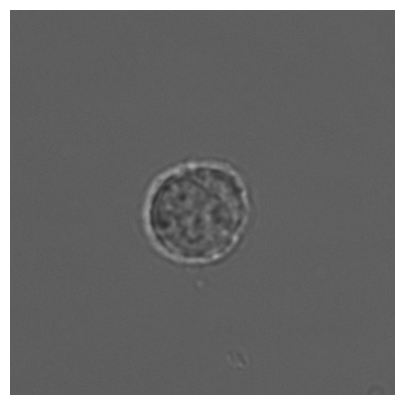

In [ ]:
sample_data_path = 'SAMPLE_DATA.TIFF'


# Load the image
img = Image.open(sample_data_path)
img = np.array(img)

# Viz
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


## 2. Preprocessing

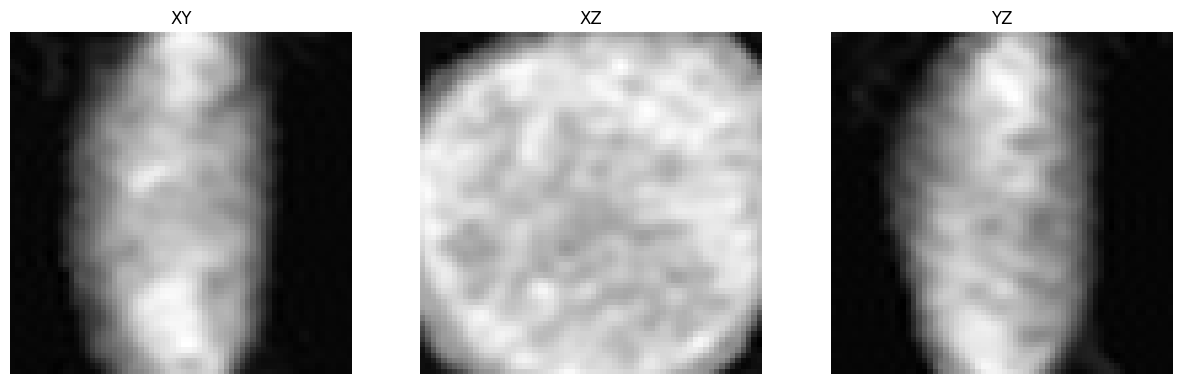

In [ ]:
## After the preprocessing of the image, the result image is 

sample_data_path = Path('DATA_DIR') / 'SAMPLE_DATA.npy'
sample_data = np.load(sample_data_path)

axes = plt.subplots(1, 3, figsize=(15, 5))[1]
ax = axes[0]
ax.imshow(sample_data[32, :, :], cmap='gray')
ax.axis('off')
ax.set_title('XY')

ax = axes[1]
ax.imshow(sample_data[:, :, 32], cmap='gray')
ax.axis('off')
ax.set_title('XZ')

ax = axes[2]
ax.imshow(sample_data[:, 32], cmap='gray')
ax.axis('off')
ax.set_title('YZ')

plt.show()

## 3. Modeling

In [ ]:
best_model = torch.load("TRAINED_MODEL.pt")
best_model.eval()
print('Model Loaded')

with torch.no_grad():
    sample_data_tensor = torch.tensor(sample_data).float().unsqueeze(0).unsqueeze(0)
    prob, *_ = best_model(sample_data_tensor)
    prob = torch.softmax(prob, dim=1)
    prob = prob.squeeze().detach().cpu().numpy()
prob

answer = 0 # Good for 20220609 -> 7 -> Good
pred = np.argmax(prob)
pred_str = "Good" if pred == 0 else "Poor"
print(f"Answer: {answer}, Prediction: {pred} ({pred_str}) with probability {prob[pred]:.2%}")

Model Loaded
Answer: 0, Prediction: 0 (Good) with probability 87.52%
